<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/amitvkulkarni/hair-health/data

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset/Predict Hair Fall.csv')
df.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [3]:
df=df.drop('Id',axis=1)

In [4]:
df.shape

(999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Genetics                   999 non-null    object
 1   Hormonal Changes           999 non-null    object
 2   Medical Conditions         999 non-null    object
 3   Medications & Treatments   999 non-null    object
 4   Nutritional Deficiencies   999 non-null    object
 5   Stress                     999 non-null    object
 6   Age                        999 non-null    int64 
 7   Poor Hair Care Habits      999 non-null    object
 8   Environmental Factors      999 non-null    object
 9   Smoking                    999 non-null    object
 10  Weight Loss                999 non-null    object
 11  Hair Loss                  999 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 93.8+ KB


In [6]:
df.duplicated().sum()

1

In [7]:
df[df.duplicated(keep=False)]

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
137,Yes,No,No Data,Antidepressants,Selenium deficiency,High,18,Yes,No,No,Yes,1
406,Yes,No,No Data,Antidepressants,Selenium deficiency,High,18,Yes,No,No,Yes,1


In [8]:
df.drop_duplicates(keep='first', inplace=True) 

In [9]:
df.describe()

,Age,Hair Loss
count,998.000000,998.000000
mean,34.204409,0.496994
std,9.368651,0.500242
min,18.000000,0.000000
25%,26.000000,0.000000
50%,34.000000,0.000000
75%,42.000000,1.000000
max,50.000000,1.000000


In [10]:
df.nunique()

Genetics                      2
Hormonal Changes              2
Medical Conditions           11
Medications & Treatments     11
Nutritional Deficiencies     11
Stress                        3
Age                          33
Poor Hair Care Habits         2
Environmental Factors         2
Smoking                       2
Weight Loss                   2
Hair Loss                     2
dtype: int64

<h2>EDA</h2>

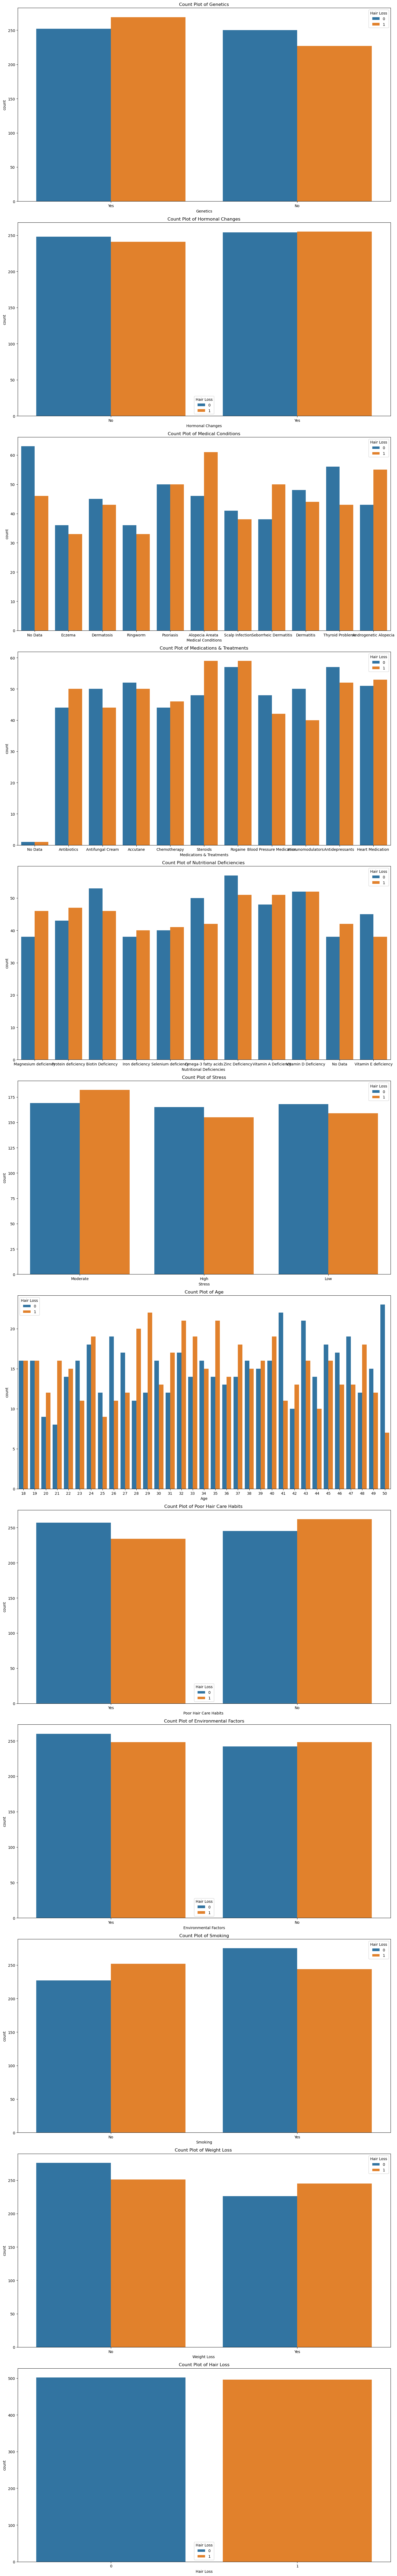

In [11]:
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(15,8 * len(df.columns)))

for i , col in enumerate(df.columns):
    sns.countplot(x=df[col], hue=df['Hair Loss'], ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
plt.tight_layout()
plt.show();

In [12]:
x = df.drop('Hair Loss', axis=1)
y = df['Hair Loss']

In [13]:
x_cat = x.select_dtypes(include='object')
x_num = x.select_dtypes(exclude='object')

encoders = {}
label_mappings = {}

for col in x_cat.columns:
    le = LabelEncoder()
    x_cat[col] = le.fit_transform(x_cat[col])
    encoders[col] = le
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

x = pd.concat([x_num, x_cat], axis=1)

for col, mapping in label_mappings.items():
    print(f"{col}")
    print(mapping)
    print(" ")

Genetics
{'No': 0, 'Yes': 1}
 
Hormonal Changes
{'No': 0, 'Yes': 1}
 
Medical Conditions
{'Alopecia Areata ': 0, 'Androgenetic Alopecia': 1, 'Dermatitis': 2, 'Dermatosis': 3, 'Eczema': 4, 'No Data': 5, 'Psoriasis': 6, 'Ringworm': 7, 'Scalp Infection': 8, 'Seborrheic Dermatitis': 9, 'Thyroid Problems': 10}
 
Medications & Treatments
{'Accutane': 0, 'Antibiotics': 1, 'Antidepressants ': 2, 'Antifungal Cream': 3, 'Blood Pressure Medication': 4, 'Chemotherapy': 5, 'Heart Medication ': 6, 'Immunomodulators': 7, 'No Data': 8, 'Rogaine': 9, 'Steroids': 10}
 
Nutritional Deficiencies 
{'Biotin Deficiency ': 0, 'Iron deficiency': 1, 'Magnesium deficiency': 2, 'No Data': 3, 'Omega-3 fatty acids': 4, 'Protein deficiency': 5, 'Selenium deficiency': 6, 'Vitamin A Deficiency': 7, 'Vitamin D Deficiency': 8, 'Vitamin E deficiency': 9, 'Zinc Deficiency': 10}
 
Stress
{'High': 0, 'Low': 1, 'Moderate': 2}
 
Poor Hair Care Habits 
{'No': 0, 'Yes': 1}
 
Environmental Factors
{'No': 0, 'Yes': 1}
 
Smoking
{

In [14]:
df2 = pd.concat([x, y], axis=1)

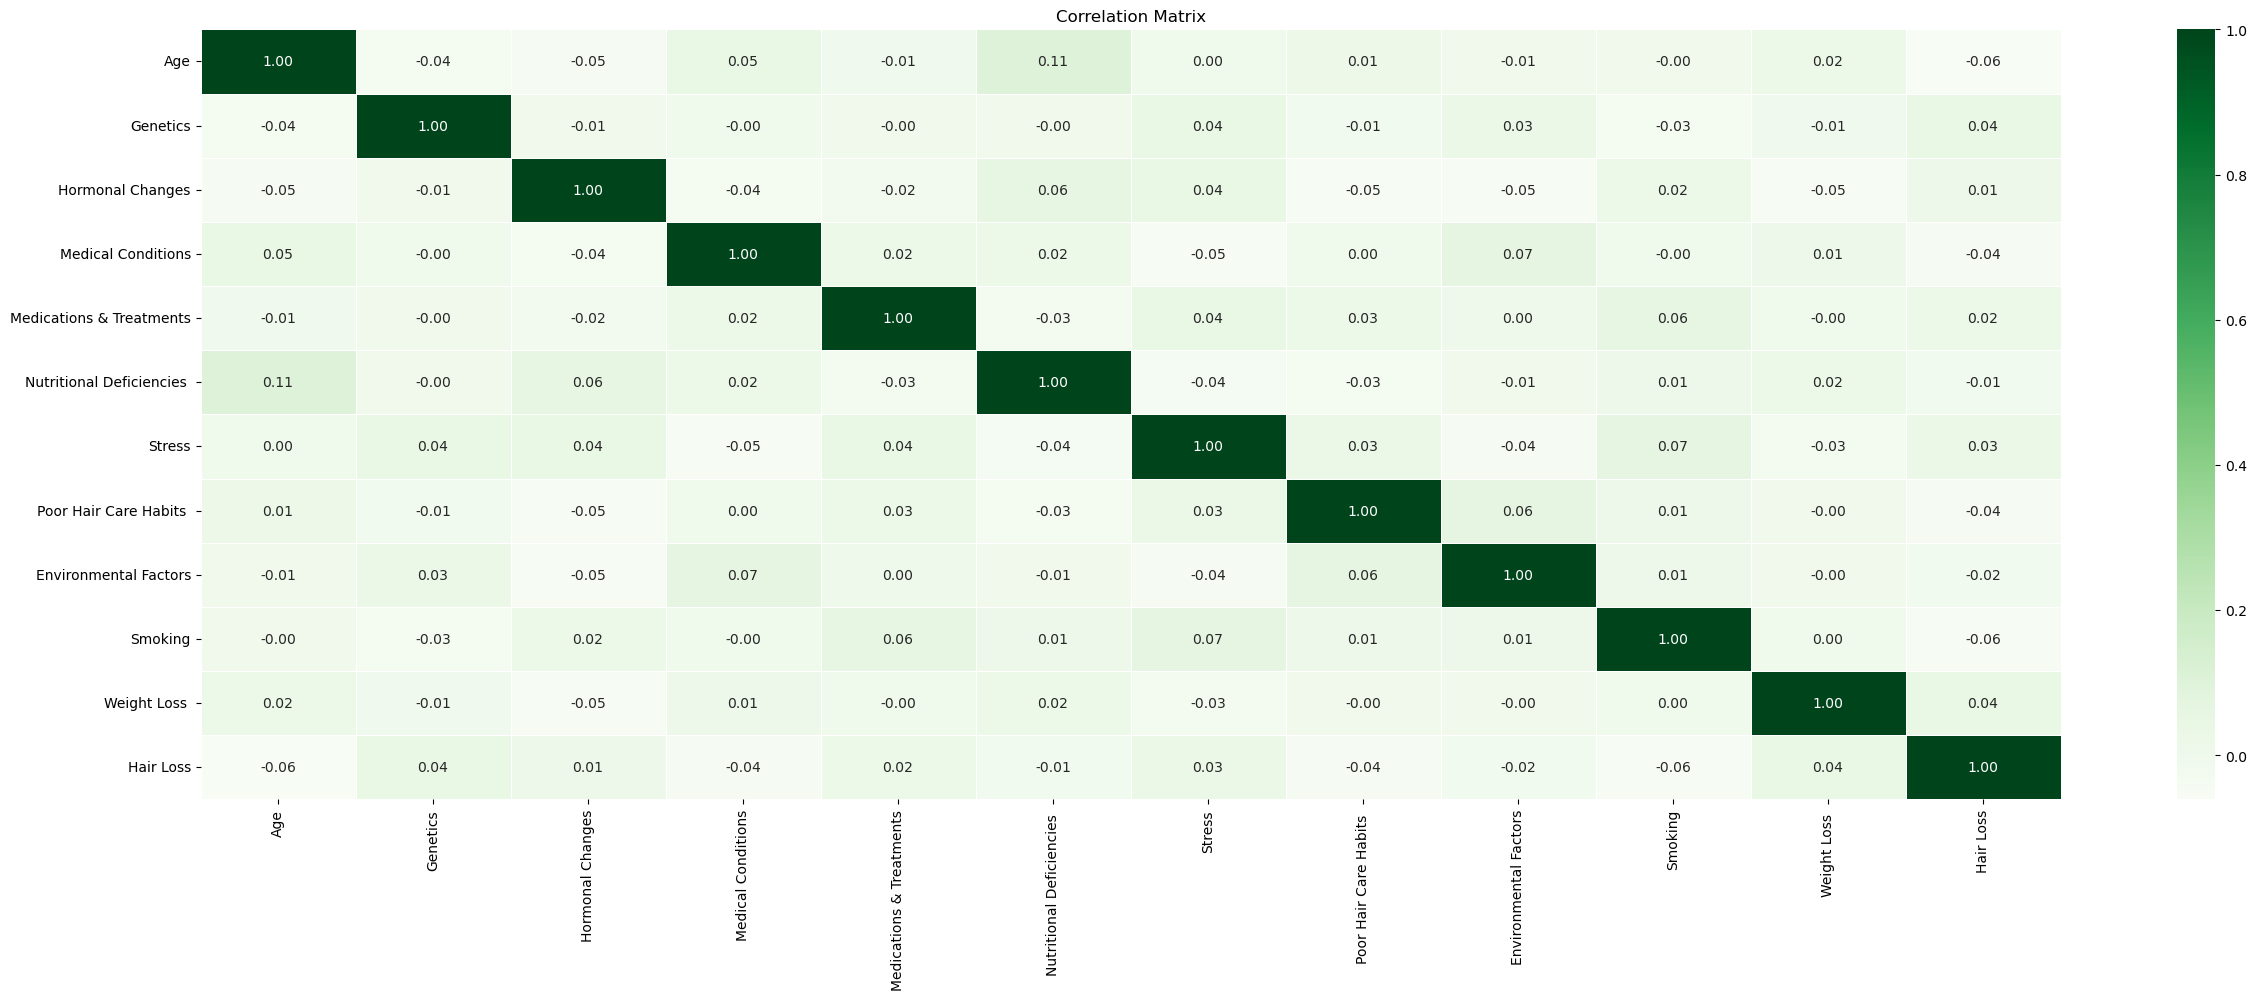

In [15]:
plt.figure(figsize=(30,10))
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap="Greens", fmt='.2f', linewidth=0.5)
plt.title('Correlation Matrix')
plt.show();

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<h2>Machine Learning</h2>

In [17]:
lr = LogisticRegression(C=0.1,random_state=42)
lr.fit(x_train, y_train)
lr.score(x_train, y_train)

0.5476190476190477

In [18]:
y_pred = lr.predict(x_test)
print('Accruacy test:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accruacy test: 0.59
              precision    recall  f1-score   support

           0       0.53      0.77      0.63        90
           1       0.70      0.45      0.54       110

    accuracy                           0.59       200
   macro avg       0.62      0.61      0.59       200
weighted avg       0.62      0.59      0.58       200

[[69 21]
 [61 49]]


<h2>Deep Learning</h2>

In [19]:
nn = tf.keras.Sequential([ 
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid') ])

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = nn.fit(x_train, y_train, epochs=50, batch_size=10, validation_data = (x_test, y_test), callbacks=[EarlyStopping(patience=5)]) 

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.4900 - loss: 0.7371 - val_accuracy: 0.4600 - val_loss: 0.7926
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4953 - loss: 0.7070 - val_accuracy: 0.4550 - val_loss: 0.7552
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5009 - loss: 0.7213 - val_accuracy: 0.4500 - val_loss: 0.7905
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5575 - loss: 0.6897 - val_accuracy: 0.4600 - val_loss: 0.7063
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5248 - loss: 0.7014 - val_accuracy: 0.5600 - val_loss: 0.6939
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4595 - loss: 0.7233 - val_accuracy: 0.5550 - val_loss: 0.7025
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5100 - loss: 0.7410 - val_accuracy: 0.4500 - val_loss: 0.8079
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5346 - loss: 0.6887 - val_accuracy: 0.4550 - 

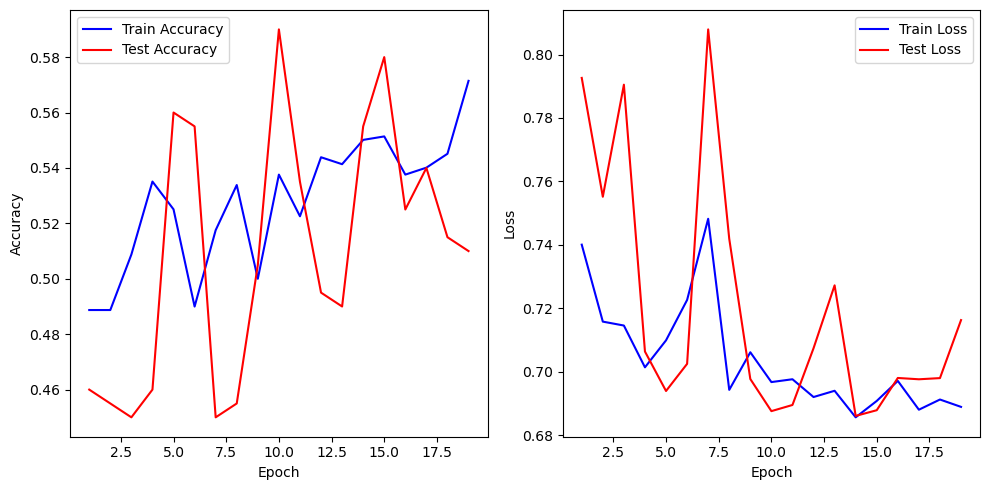

In [20]:
# learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
# adusting layout for better spacing
plt.tight_layout()
# display the figure
plt.show();

In [21]:
pred = nn.predict(x_test)
y_pred = (pred > 0.5).astype(int) 

print("Test Accuracy:", accuracy_score(y_test, y_pred))    
print(classification_report(y_test, y_pred))    
print(confusion_matrix(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Test Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.48      0.86      0.61        90
           1       0.66      0.23      0.34       110

    accuracy                           0.51       200
   macro avg       0.57      0.54      0.47       200
weighted avg       0.58      0.51      0.46       200

[[77 13]
 [85 25]]


<h2>Machine Learning vs Deep Learning</h2>

In [22]:
x_train.columns

Index(['Age', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss '],
      dtype='object')

In [23]:
new_df = np.array([[30, 1, 1, 9, 0, 6, 0, 0, 1, 0, 1]])

ML_pred = lr.predict(new_df)

pred = nn.predict(new_df)
NN_pred = (pred > 0.5).astype(int)

print("ML Prediction for Hair Loss: ", ML_pred)
print("DL Prediction for Hair Loss:", NN_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
ML Prediction for Hair Loss:  [1]
DL Prediction for Hair Loss: [[0]]
